<a href="https://colab.research.google.com/github/vydiep/MLProject/blob/main/CNNModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

In [53]:
def load_images_from_path(path, label):
  images = []
  labels = []

  # Load all .png files and converts them into arrays of shape `(224, 224, 3)
  # Append arrays to images and labels
  for file in os.listdir(path):
    if file.endswith('.png'):
      images.append(tf.keras.utils.img_to_array(tf.keras.utils.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
      labels.append(label)

  return images, labels

def show_images(images):
  # Create figure with 8 subplots
  fig, axes = plt.subplots(1, 8, figsize = (20,20), subplot_kw={'xticks': [], 'yticks': []})

  for i, ax in enumerate(axes.flat):
    # Normalize the pixel values of the image array
    ax.imshow(images[i] / 255)

x = []
y = []

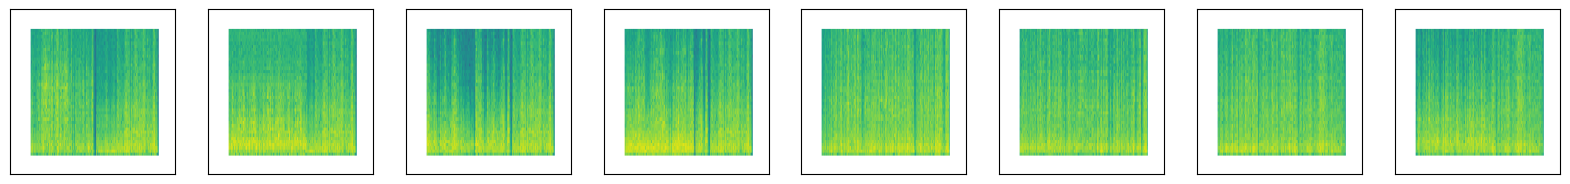

In [54]:
path = '/content/drive/Shareddrives/MLProject/MusicNet/data/Beethoven'
images, labels = load_images_from_path(path, 0) # Assign 0 to the spectrograms
    
x += images
y += labels

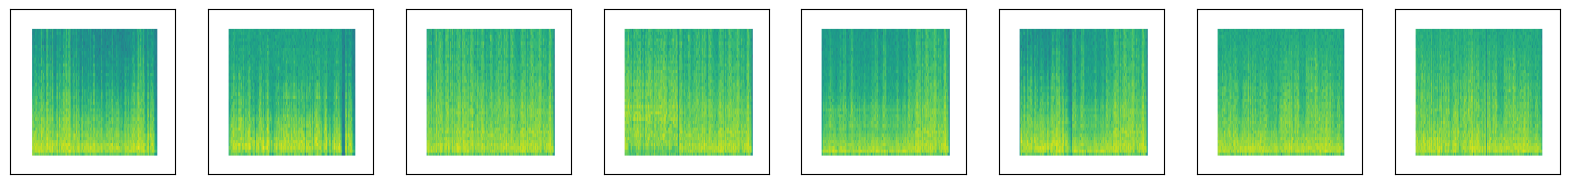

In [55]:
path = '/content/drive/Shareddrives/MLProject/MusicNet/data/Other'
images, labels = load_images_from_path(path, 1) # Assign 1 to the spectrograms
show_images(images)
    
x += images
y += labels

In [57]:
# Split lists x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 0)

# Normalize pixel values in x_train and x_test to ensure values are in range [0,1]
x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

# Each class label is converted into a binary vector
# Index corresponding to label is 1, other indices are 0
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [61]:
# Define a CNN model using the Keras Sequential API
model = Sequential()

# Create a convoultion kernel that is convolved with the input layer to produce a tensor of outputs
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Reduce spatial dimensions of the output
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Convert 3D tensor into a 1D tensor
model.add(Flatten())

# Learn more complex patterns in data that may not have been captured by the convolutional layers
model.add(Dense(1024, activation='relu'))

# Produce a probability distribution over the two output classes for predictions
model.add(Dense(2, activation='softmax'))

# Configure the model for training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 26, 26, 128)     

In [64]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
24/24 [==============================] - 59s 2s/step - loss: 0.6838 - accuracy: 0.5758 - val_loss: 0.6766 - val_accuracy: 0.5253
Epoch 2/10
24/24 [==============================] - 59s 2s/step - loss: 0.6347 - accuracy: 0.6667 - val_loss: 0.6278 - val_accuracy: 0.6263
Epoch 3/10
24/24 [==============================] - 55s 2s/step - loss: 0.6243 - accuracy: 0.6234 - val_loss: 0.6078 - val_accuracy: 0.6667
Epoch 4/10
24/24 [==============================] - 60s 3s/step - loss: 0.5449 - accuracy: 0.7143 - val_loss: 0.7760 - val_accuracy: 0.6667
Epoch 5/10
24/24 [==============================] - 55s 2s/step - loss: 0.4526 - accuracy: 0.7619 - val_loss: 0.5718 - val_accuracy: 0.7273
Epoch 6/10
24/24 [==============================] - 55s 2s/step - loss: 0.3610 - accuracy: 0.8268 - val_loss: 0.6704 - val_accuracy: 0.7879
Epoch 7/10
24/24 [==============================] - 60s 3s/step - loss: 0.3474 - accuracy: 0.8355 - val_loss: 0.6118 - val_accuracy: 0.8182
Epoch 8/10
24/24 [==

[]

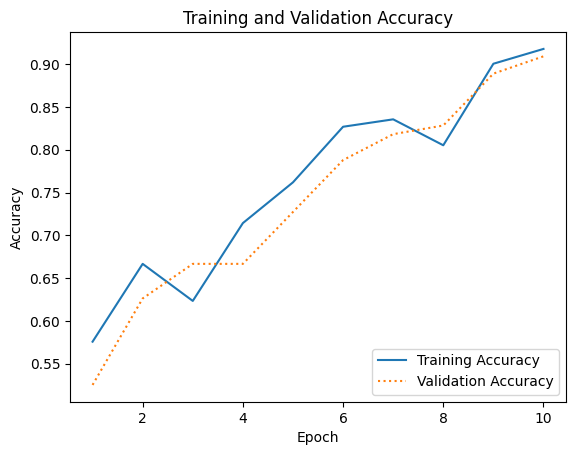

In [65]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [67]:
# Using MobileNetV2, a model that has been trained on a large dataset of images
# Exclude the top layer of the pretrained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Scale pixel values of images so they are in the range [-1, 1]
x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

# Store extracted features
train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

4/4 [==============================] - 6s 1s/step


In [68]:
# Create new sequential model for top layer
model = Sequential()

# Convert extracted features from pretrained model into a 1D vector
model.add(Flatten(input_shape=train_features.shape[1:]))


model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
24/24 [==============================] - 27s 1s/step - loss: 2.5700 - accuracy: 0.8528 - val_loss: 2.0311 - val_accuracy: 0.8586
Epoch 2/10
24/24 [==============================] - 26s 1s/step - loss: 1.9312 - accuracy: 0.8701 - val_loss: 1.9215 - val_accuracy: 0.8586
Epoch 3/10
24/24 [==============================] - 26s 1s/step - loss: 0.2513 - accuracy: 0.9654 - val_loss: 1.9498 - val_accuracy: 0.8384
Epoch 4/10
24/24 [==============================] - 27s 1s/step - loss: 0.5755 - accuracy: 0.9394 - val_loss: 2.5266 - val_accuracy: 0.8384
Epoch 5/10
24/24 [==============================] - 26s 1s/step - loss: 1.2147 - accuracy: 0.9004 - val_loss: 2.2575 - val_accuracy: 0.7980
Epoch 6/10
24/24 [==============================] - 27s 1s/step - loss: 0.2426 - accuracy: 0.9654 - val_loss: 2.5429 - val_accuracy: 0.7879
Epoch 7/10
24/24 [==============================] - 26s 1s/step - loss: 0.0502 - accuracy: 0.9913 - val_loss: 1.9066 - val_accuracy: 0.8384
Epoch 8/10
24/24 [==

[]

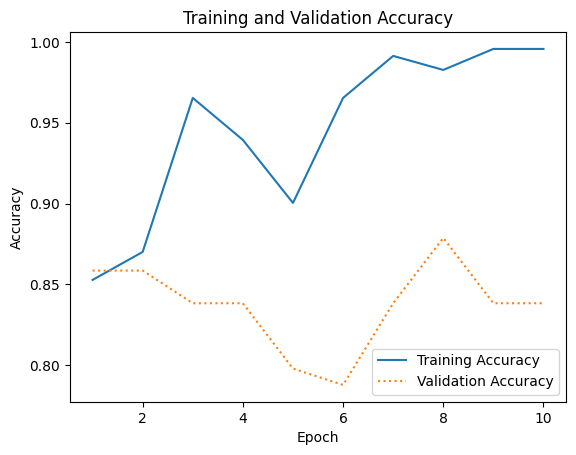

In [71]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Note that neural network will train differently every time. Train ~20 times and average results.